In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
_2019 = pd.read_csv('../data/IMDB_mine_data_2019.csv')
_2018 = pd.read_csv('../data/IMDB_mine_data_2018.csv')
_2017 = pd.read_csv('../data/IMDB_mine_data_2017.csv')
_2016 = pd.read_csv('../data/IMDB_mine_data_2016.csv')
_2015 = pd.read_csv('../data/IMDB_mine_data_2015.csv')

In [5]:
#get all the films into one DF
films = pd.concat([_2019,_2018,_2017,_2016,_2015])

In [6]:
# remove the filler films we were using to start the mining bot
films = films[films['title_code'] != np.nan]
films = films[films['release_date'] != '1980-05-16']
films.shape

(2965, 27)

In [7]:
#films.release_date
print(_2019.shape, _2018.shape, _2017.shape, _2016.shape, _2015.shape)

(482, 27) (683, 27) (675, 27) (609, 27) (520, 27)


In [8]:
films.head(2000)

Unnamed: 0                                              title  runtime  \
1             0                                Motherless Brooklyn        0   
2             0                                Alita: Battle Angel        0   
3             0                                       Danger Close        0   
4             0                                            Shazam!        0   
5             0                              The Last Full Measure        0   
6             0                                       Pet Sematary        0   
7             0                     Fiddler: A Miracle of Miracles        0   
8             0              Linda Ronstadt: The Sound of My Voice        0   
9             0                                            P Storm        0   
10            0                             Between Me and My Mind        0   
11            0            Patterns of Evidence: Moses Controversy        0   
12            0                                          Countdown        0   
13            0                           Faustina: Love and Mercy        0   
14            0                      Made in Abyss: Journey's Dawn        0   
15            0                          The Spy Behind Home Plate        0   
16            0                                      Killing Sarai        0   
17            0                           Roger Waters - Us + Them        0   
18            0                                 Kingdom Men Rising        0   
19            0                                         Incitement        0   
20            0                                    Blink of an Eye        0   
21            0                           42nd Street: The Musical        0   
22            0                                        Foosballers        0   
23            0                              My People, My Country        0   
24            0                              La femme de mon frère        0   
25            0                                       CatVideoFest        0   
26            0          National Theater Live: Cyrano de Bergerac        0   
27            0                         Grateful Dead Meet-Up 2019        0   
28            0                                         Looking Up        0   
29            0                                     Les Misérables        0   
30            0                                           Beanpole        0   
31            0                   The Gangster, the Cop, the Devil        0   
32            0                        Agent Sai Srinivasa Athreya        0   
33            0                                        The Bravest        0   
34            0                                         First Love        0   
35            0                                    Always Miss You        0   
36            0                                         Gemini Man        0   
37            0                           Chonda Pierce: Unashamed        0   
38            0                                     Rapid Response        0   
39            0             Chasing the Dragon II: Wild Wild Bunch        0   
40            0                                              VHYes        0   
41            0                       Line Walker 2: Invisible Spy        0   
42            0                                   The Moneychanger        0   
43            0  Once Were Brothers: Robbie Robertson and the Band        0   
44            0                              Detective Chinatown 3        0   
45            0                                                10E        0   
46            0                                   To Be of Service        0   
47            0                                          Raatchasi        0   
48            0                           Kinky Boots: The Musical        0   
49            0                                               ECCO        0   
50            0                                Todo por

In [9]:
#Reset the index now that all films are in 1 dataframe
films = films.reset_index(drop=True)

# Cleaning fields and filling in some of the columns

In [10]:
re.findall(r"'(.*?)'",films.prod_co[0], re.DOTALL)

['Class 5 Films', 'Warner Bros.']

In [11]:
films.prod_co = films.prod_co.map(lambda x : re.findall(r"'(.*?)'",x, re.DOTALL))
films.prod_co[5]

['Paramount Pictures', 'Paramount Pictures']

In [12]:
films.prod_co[1][1]

'Twentieth Century Fox'

In [13]:
#break production and distribution out into their own columns
films['production'] = films['prod_co'].map(lambda x : x[0] if len(x) >= 1 else np.nan)
films['production_2'] = films['prod_co'].map(lambda x : x[1] if len(x) >= 3 else np.nan)
films['distribution'] = films['prod_co'].map(lambda x : x[-1] if len(x) >= 2 else np.nan)

In [14]:
#convert the release date to a pandas datetime object
films['release_date'] = films['release_date'].map(lambda x : pd.to_datetime(x))

In [15]:
#Set the first director to their own column
films.directors = films.directors.map(lambda x : re.findall(r"'(.*?)'",x, re.DOTALL if isinstance(x, str) else np.nan))
films['director'] = films['directors'].map(lambda x: x[0] if len(x) >= 1 else np.nan)

In [16]:
print("The highest grossing film made: $"+str(films['opening_wknd'].max()))
print("The lowest grossing film made: $"+str(films['opening_wknd'].min()))
print("The variance in opening weekend is: $"+str(films['opening_wknd'].var()))
print("The average opening weekend is: $"+str(round(films['opening_wknd'].mean())))

The highest grossing film made: $357115007.0
The lowest grossing film made: $108.0
The variance in opening weekend is: $449801058804183.4
The average opening weekend is: $6284064.0


[Text(0, 0, '$400M'),
 Text(0, 0, '$350M'),
 Text(0, 0, '$300M'),
 Text(0, 0, '$250M'),
 Text(0, 0, '$200M'),
 Text(0, 0, '$150M'),
 Text(0, 0, '$100M'),
 Text(0, 0, '$50M'),
 Text(0, 0, '')]

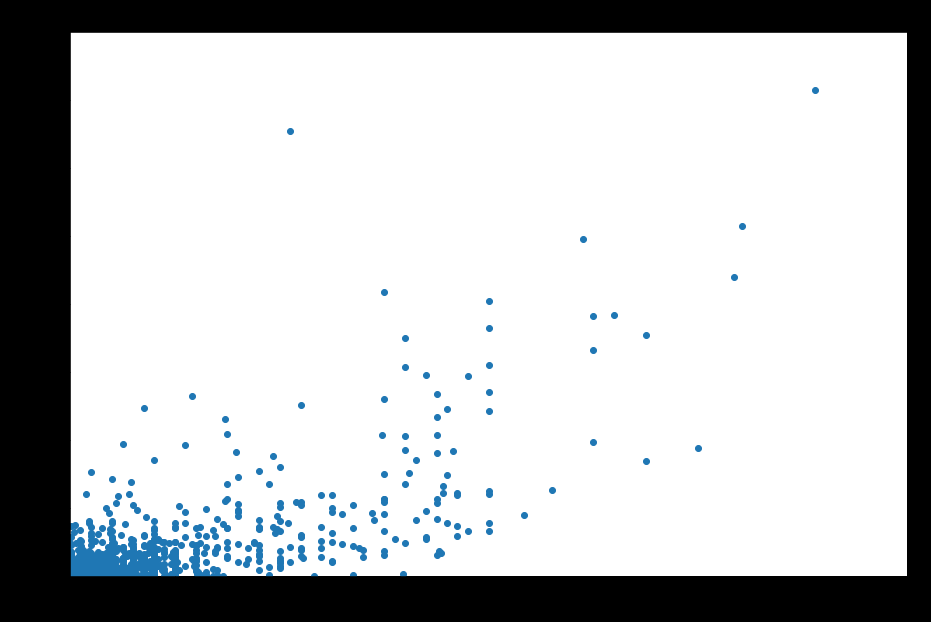

In [17]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US' )

ylab = np.arange(0,401, 50)
xlab = np.arange(0,401, 50)

fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(films.budget, films.opening_wknd)
ax.ticklabel_format(style='plain')
ax.set_ylabel('Opening Weekend Revenue', fontsize=18)
ax.set_xlabel('Film Budget', fontsize=18)
ax.set_title('Budget vs Opening Weekend (usd)', fontsize=24)
ax.grid(False)

fig.patch.set_facecolor('black')
plt.style.use('bmh')
#plt.rc('axes', labelsize=18)
plt.ylim(0, 400000000)
plt.xlim(0, 400000000)


labels = [item for item in ax.get_xticklabels()]
#print(labels)
ylabels = [item for item in ax.get_yticklabels()]
#print(ylabels)
for i in range(len(labels)):
    if i==0:
        labels[i] = ''
        continue
    labels[i] = "${}M".format(xlab[i])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])



#plt.savefig('img/Budget.v.BoxOffice2.png')

(0, 1010000)

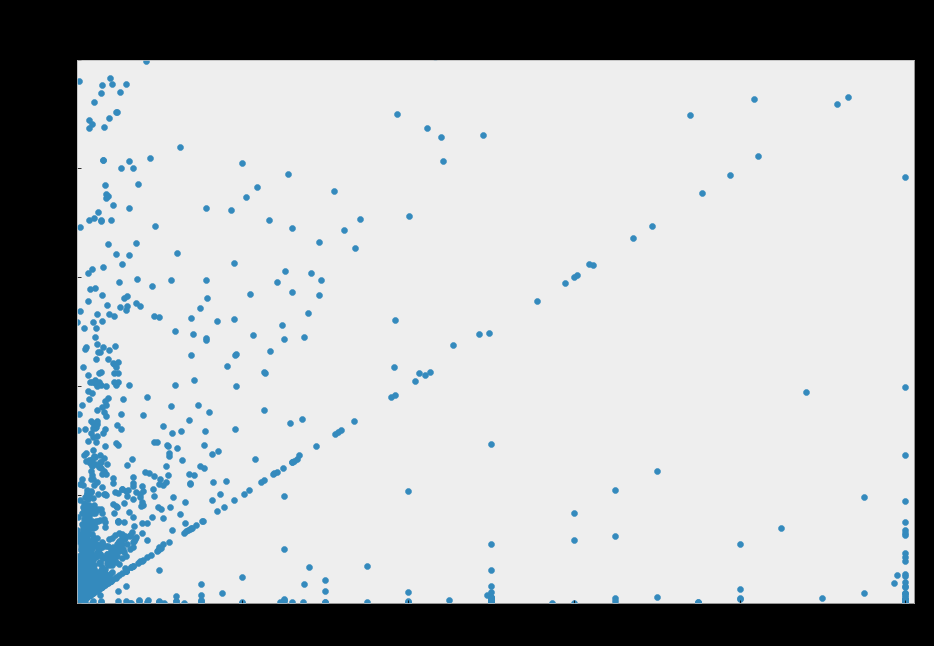

In [18]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(films.budget, films.opening_wknd)
ax.ticklabel_format(style='plain')
ax.set_ylabel('Opening Weekend Revenue', fontsize=18)
ax.set_xlabel('Film Budget', fontsize=18)
ax.set_title('Budget vs Opening Weekend (usd)\nless than $1M', fontsize=24)
ax.grid(False)

fig.patch.set_facecolor('black')
plt.style.use('bmh')
#plt.rc('axes', labelsize=18)
plt.ylim(0, 1000000)
plt.xlim(0, 1010000)




#plt.savefig('img/Budget.v.BoxOffice-OHNO2.png')

AttributeError: 'DataFrame' object has no attribute 'actor1_popularity'

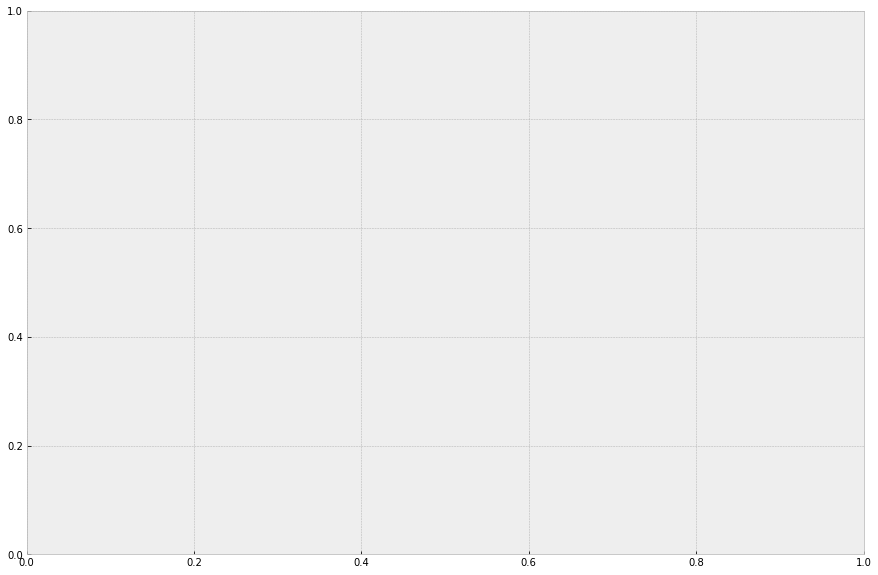

In [84]:
fig, ax = plt.subplots(figsize=(15,10))


ax.scatter(films.actor1_popularity, films.opening_wknd, alpha=0.6, label='lead actor')
#ax.scatter(films.actor2_popularity, films.opening_wknd, alpha=0.4, c='red', label='2nd billed')
#ax.scatter(films.actor3_popularity, films.opening_wknd, alpha=0.2, c='green', label='3rd billed')
#ax.scatter(films.actor4_popularity, films.opening_wknd, alpha=0.55, c='brown', label='4th billed')
#ax.scatter(films.actor5_popularity, films.opening_wknd, alpha=0.5, c='purple', label='5th billed')
#ax.scatter(films.actor6_popularity, films.opening_wknd, alpha=0.45, c='green', label='6th billed')
#ax.scatter(films.actor7_popularity, films.opening_wknd, alpha=0.4, c='yellow', label='7th billed')
#ax.scatter(films.actor8_popularity, films.opening_wknd, alpha=0.3, c='black', label='8th billed')
#ax.scatter(films.actor9_popularity, films.opening_wknd, alpha=0.2, c='brown', label='9th billed')
#ax.scatter(films.actor10_popularity, films.opening_wknd, alpha=0.1, c='coral', label='10th billed')
ax.ticklabel_format(style='plain')
ax.set_ylabel('Opening Weekend Revenue', fontsize=18)
ax.set_xlabel('IMDB Popularity Score', fontsize=18)
ax.set_title('Cast Popularity vs Opening Weekend', fontsize=24)
ax.grid(False)

fig.patch.set_facecolor('black')
plt.style.use('bmh')
#plt.rc('axes', labelsize=18)
plt.ylim(-1000000, 400000000)
plt.xlim(-100, 5000)
plt.legend()

l=plt.legend()
for text in l.get_texts():
    text.set_color('black')
    
ylab = ['','$0', '$50M', '$100M', '$150M', '$200M', '$250M', '$300M', '$350M', '$400M']
ax.set_yticklabels(ylab)

#plt.savefig('img/AllActorPop-v-OpeningWknd3.png')

In [85]:
# look at the revenue by month of release.
df = films.copy()
df.index = pd.to_datetime(df.release_date)
df['month'] = df.index.month
df['year'] = df.index.year
avg = df.groupby(pd.Grouper(freq='M')).sum()

7


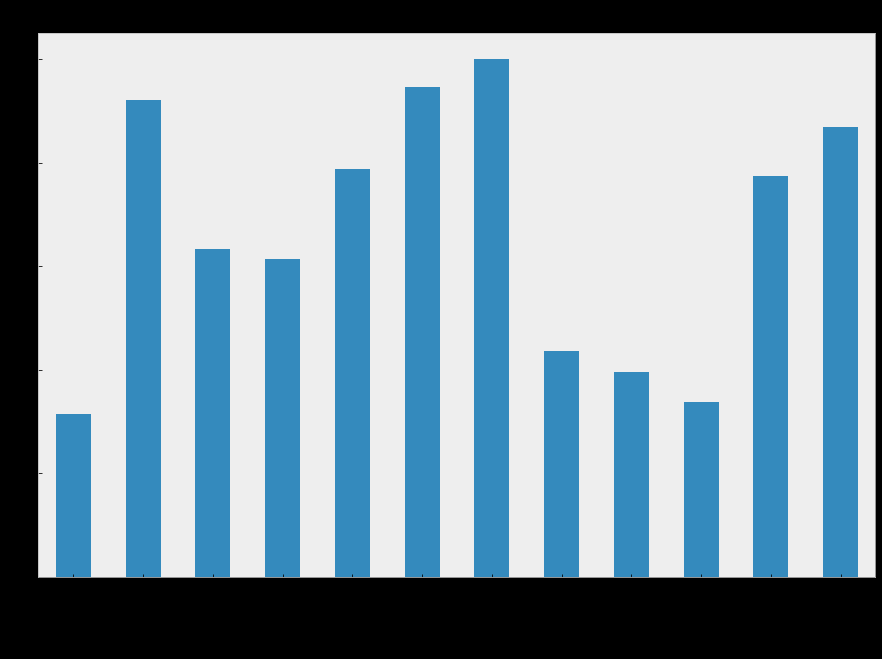

In [86]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ylab = ['$0', '$2M', '$4M', '$6M', '$8M', '$10M', '$12M']

fig, ax1 = plt.subplots(figsize=(15,10))

df.groupby('month').agg({'opening_wknd': 'mean'}).plot(figsize=(15,10), xlim=(1,2), grid=False, kind='bar', style='plain', legend=False, ax=ax1)
ax1.set_title('Average Opening Box Office of ALL Films by Month', fontsize=26)
fig.patch.set_facecolor('black')

labels = [item.get_text() for item in ax1.get_xticklabels()]
for i in range(len(labels)):
    labels[i] = months[i]
ax1.set_xticklabels(labels)
#ax1.ticklabel_format(style='plain')

ylabels = [item.get_text() for item in ax1.get_yticklabels()]
for i in range(len(ylabels)):
    ylabels[i] = ylab[i]
ax1.set_yticklabels(ylabels)
print(len(ylabels))

#plt.tight_layout()
#plt.savefig('img/AvgBoxOffice_byMonth3.png')

IndexError: list index out of range

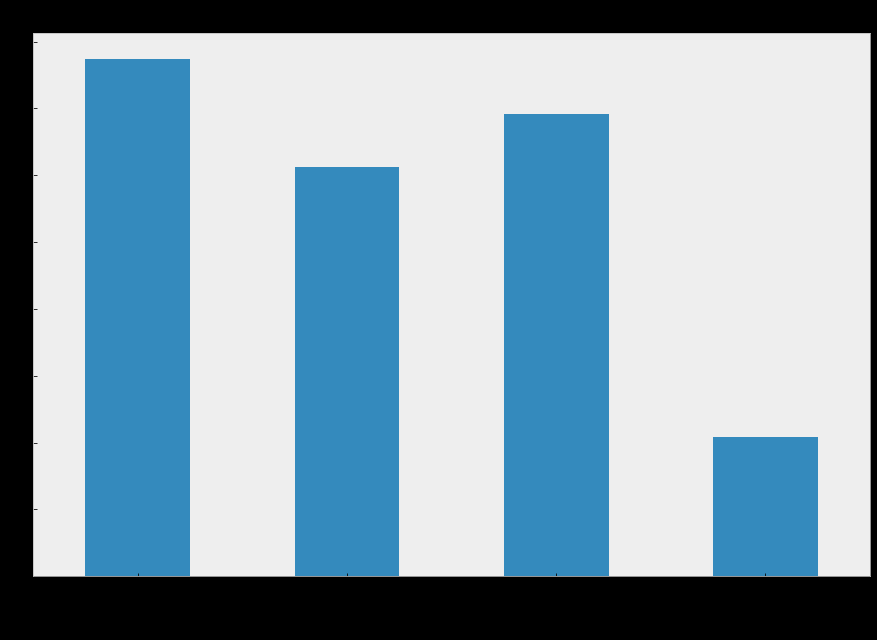

In [87]:
ylab = ['$0', '$5M', '$10M', '$15M', '$20M']
xlab = ['G', 'PG', 'PG-13', 'R']

fig, ax1 = plt.subplots(figsize=(15,10))

rate_df = df[df['rating'] != 'Approved']
rate_df = rate_df[rate_df['rating'] != 'Not Rated']
rate_df = rate_df[rate_df['rating'] != 'Unrated']
rate_df = rate_df[rate_df['rating'] != 'M']
rate_df = rate_df[rate_df['rating'] != 'TV-14']
rate_df = rate_df[rate_df['rating'] != 'TV-G']
rate_df = rate_df[rate_df['rating'] != 'NC-17']
rate_df = rate_df[rate_df['rating'] != 'TV-MA']
rate_df = rate_df[rate_df['rating'] != 'TV-PG']

rate_df.groupby('rating').agg({'opening_wknd': 'mean'}).plot(figsize=(15,10), grid=False, kind='bar', style='plain', legend=False, ax=ax1)
ax1.set_title('Average Opening Box Office by MPAA Rating', fontsize=26)
plt.style.use('bmh')
fig.patch.set_facecolor('black')
#ax1.set_ylabel('Average Opening Revenue', fontsize=20)
ax1.set_xlabel('MPAA Rating', fontsize=20)

ylabels = [item.get_text() for item in ax1.get_yticklabels()]
for i in range(len(ylabels)):
    ylabels[i] = ylab[i]
ax1.set_yticklabels(ylabels, fontsize=14)

labels = [item.get_text() for item in ax1.get_xticklabels()]
for i in range(len(labels)):
    labels[i] = xlab[i]
ax1.set_xticklabels(labels, fontsize=16)

for tick in ax1.get_xticklabels():
    tick.set_rotation(0)

#plt.savefig('img/AvgBoxOffice_byRating3.png')

In [ ]:
action = films[films['action'] > 0]
adventure = films[films['adventure'] > 0]
animated = films[films['animated'] > 0]
biography = films[films['biography'] > 0]
drama = films[films['drama'] > 0]
documentary = films[films['documentary'] > 0]
comedy = films[films['comedy'] > 0]
crime = films[films['crime'] > 0]
fantasy = films[films['fantasy'] > 0]
family = films[films['family'] > 0]
musical = films[films['musical'] > 0]
horror = films[films['horror'] > 0]
war = films[films['war'] > 0]
mystery = films[films['mystery'] > 0]
sci_fi = films[films['sci-fi'] > 0]
thriller = films[films['thriller'] > 0]
romance = films[films['romance'] > 0]

In [88]:
act_avg = action['opening_wknd'].mean()
adv_avg = adventure['opening_wknd'].mean()
anim_avg = animated['opening_wknd'].mean()
com_avg = comedy['opening_wknd'].mean()
crm_avg = crime['opening_wknd'].mean()
bio_avg = biography['opening_wknd'].mean()
dra_avg = drama['opening_wknd'].mean()
doc_avg = documentary['opening_wknd'].mean()
fan_avg = fantasy['opening_wknd'].mean()
fam_avg = family['opening_wknd'].mean()
mus_avg = musical['opening_wknd'].mean()
hor_avg = horror['opening_wknd'].mean()
war_avg = war['opening_wknd'].mean()
mys_avg = mystery['opening_wknd'].mean()
sci_avg = sci_fi['opening_wknd'].mean()
thr_avg = thriller['opening_wknd'].mean()
rom_avg = romance['opening_wknd'].mean()

NameError: name 'action' is not defined

In [89]:
labs =['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Fantasy', 
       'Family', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War']
vals = [act_avg, adv_avg, anim_avg, bio_avg, com_avg, crm_avg, dra_avg, doc_avg, fan_avg, fam_avg, hor_avg, mus_avg,
       mys_avg, rom_avg, sci_avg, thr_avg, war_avg]
ylab = ['$0', '$5M', '$10M', '$15M', '$20M', '$25M', '$30M']

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.bar(labs,vals)
fig.patch.set_facecolor('black')
#ax1.set_ylabel('Average Opening Revenue', fontsize=20)
ax1.set_xlabel('Average Opening by Genre', fontsize=20)
ax1.grid(False)

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
plt.setp(ax1.xaxis.get_majorticklabels(), ha='right')

ylabels = [item.get_text() for item in ax1.get_yticklabels()]
for i in range(len(ylabels)):
    ylabels[i] = ylab[i]
ax1.set_yticklabels(ylabels, fontsize=14)

plt.savefig('img/AvgOpeningByGenre1.png')

NameError: name 'act_avg' is not defined

IndexError: list index out of range

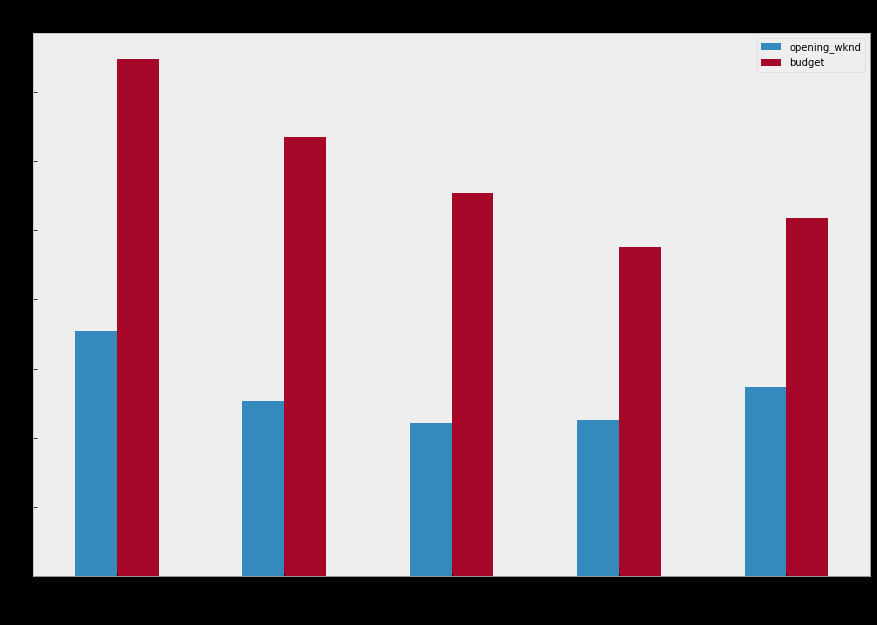

In [90]:
xlab = ['2015', '2016', '2017', '2018', '2019']
ylab = ['$0', '$5M', '$10M', '$15M', '$20M']

fig, ax1 = plt.subplots(figsize=(15,10))

df[df.index.year < 2020].groupby('year').agg({'opening_wknd': 'mean', 'budget':'mean'}).plot(figsize=(15,10), kind='bar', grid=False, ax=ax1)
ax1.set_title('Average Budget & Opening by Year', fontsize=26)
fig.patch.set_facecolor('black')
ax1.set_xlabel('Year', fontsize=20)

labels = [item.get_text() for item in ax1.get_xticklabels()]
for i in range(len(labels)):
    labels[i] = xlab[i]
ax1.set_xticklabels(labels, fontsize=16)

for tick in ax1.get_xticklabels():
    tick.set_rotation(0)
    
ylabels = [item.get_text() for item in ax1.get_yticklabels()]
for i in range(len(ylabels)):
    ylabels[i] = ylab[i]
ax1.set_yticklabels(ylabels, fontsize=14)

l=plt.legend()
l.get_texts()[0].set_text('Opening Weekend')
l.get_texts()[1].set_text('Budget')
for text in l.get_texts():
    text.set_color('black')
    
plt.savefig('img/AvgBudget-OpeningByYear11.png')

# Looking at the actors now.

In [91]:
from collections import defaultdict

def leaders(xs, top=21):
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    return sorted(counts.items(), reverse=True, key=lambda tup: tup[1])[:top]

def tailers(xs, top=21):
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    return sorted(counts.items(), reverse=False, key=lambda tup: tup[1])[:top]

In [92]:
all_actors = list(films.actor1) + list(films.actor2) + list(films.actor3) + list(films.actor4) + list(films.actor5) + list(films.actor6) + list(films.actor7) + list(films.actor8) + list(films.actor9) + list(films.actor10)
print(len(np.unique(all_actors)))
unique_actors = np.unique(all_actors)

19568


In [93]:
topActors = leaders(all_actors, top=20)[1:]
bottomActors = tailers(all_actors, top=20)
topActors

[('/name/nm0000168/', 16),
 ('/name/nm0000437/', 14),
 ('/name/nm1209966/', 13),
 ('/name/nm0000285/', 13),
 ('/name/nm0000173/', 13),
 ('/name/nm0290556/', 12),
 ('/name/nm0000616/', 12),
 ('/name/nm0425005/', 12),
 ('/name/nm0366389/', 12),
 ('/name/nm0788335/', 12),
 ('/name/nm1221047/', 12),
 ('/name/nm0799777/', 12),
 ('/name/nm0131966/', 12),
 ('/name/nm0000204/', 11),
 ('/name/nm0000115/', 11),
 ('/name/nm3485845/', 11),
 ('/name/nm0818055/', 11),
 ('/name/nm0000160/', 11),
 ('/name/nm3053338/', 11)]

In [94]:
# Exporting a csv for the actor popularity scraper to use.
#pd.Series(np.unique(list(films.actor1))[:-1]).to_csv('data/actor1_unique_list.csv')

In [95]:
len(np.array(actor_key['actor']))
missing = []
def find_missing_keys(key):
    #print(key)
    if isinstance(key, float):
        return key
    if len(actor_key.loc[actor_key['0'] == key]) < 1:
        missing.append(key)
        print("appended "+key)
        return
    return 'cleared'

for k in all_actors:
    find_missing_keys(k)
    
print(missing)

NameError: name 'actor_key' is not defined

In [96]:
#pd.DataFrame(missing, columns=['actor']).to_csv('data/missing_actors.csv')

In [97]:
len(missing)

NameError: name 'missing' is not defined

In [98]:
#generating a list of missing actor codes for the bot to go fetch for me
codes = [i[0] for i in topActors]
missing_codes =[]
gathered = np.array(actor_key['actor'])
for c in unique_actors:
    if c not in gathered:
        missing_codes.append(c)

print(len(missing_codes))
fetch_df = pd.DataFrame(unique_actors, columns=['actor'])
#fetch_df.to_csv('data/actor_popularity_fetch_list.csv')
fetch_df.info()

NameError: name 'actor_key' is not defined

In [99]:
a_keys = [i[0] for i in topActors]
b_keys = [i[0] for i in bottomActors]
a_keys
b_keys

['/name/nm11046471/',
 '/name/nm0740168/',
 '/name/nm10651990/',
 '/name/nm10810195/',
 '/name/nm5634768/',
 '/name/nm4069220/',
 '/name/nm7617524/',
 '/name/nm10758564/',
 '/name/nm10385769/',
 '/name/nm3054850/',
 '/name/nm4060295/',
 '/name/nm1060352/',
 '/name/nm10600316/',
 '/name/nm10603252/',
 '/name/nm4147126/',
 '/name/nm10695943/',
 '/name/nm2114691/',
 '/name/nm2306402/',
 '/name/nm3721607/',
 '/name/nm0448486/']

NameError: name 'actor_key' is not defined

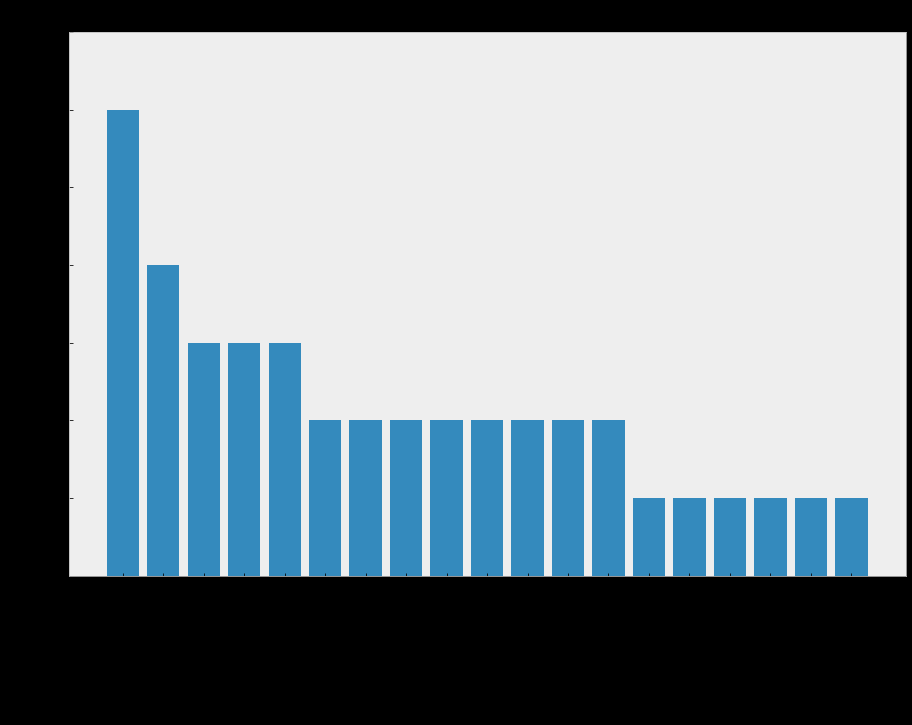

In [100]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(*zip(*topActors))
plt.xticks(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.ylim(10,17)
plt.xticks(fontsize=15)

ax.set_ylabel('Number of films', fontsize=20)
ax.set_xlabel('Actor', fontsize=20)
ax.set_title('20 Most Film Credits by Actor (2015-2019)', fontsize=24)
fig.patch.set_facecolor('black')
ax.grid(False)

labels = get_actor_names(a_keys)
ax.set_xticklabels(labels)

plt.tight_layout()
#plt.savefig('img/FilmCountByActor4.png')

In [ ]:
#going back to pull all the title codes to send director bot to fetch director popularity
#films['title_code'].to_csv('data/director_popularity_scrape_list.csv')

In [101]:
actor_key = pd.read_csv('data/actor_key.csv', index_col=0).reset_index(drop=True)
#actor_key = pd.read_csv('data/2019_actors_out.csv', index_col=0).append(missing_df).reset_index() #<--- This is a dirty hack to push a missing actor into the DF
actor_key.shape
actor_key.head()

FileNotFoundError: [Errno 2] File data/actor_key.csv does not exist: 'data/actor_key.csv'

In [102]:
row = actor_key.loc[actor_key['actor'] == '/name/nm0136797/'].index[0] #/name/nm0000168/
print(row)
actor_key.iloc[row]['name']

NameError: name 'actor_key' is not defined

In [103]:
def get_actor_names(keys):
    r = []
    for k in keys:
        r.append(get_actor_name(k))
    return r

def get_actor_name(key):
    #print(key)
    row = actor_key.loc[actor_key['actor'] == key].index[0]
    return(actor_key.iloc[row]['name'])

def get_actor_key(name):
    #print(key)
    row = actor_key.loc[actor_key['name'] == name].index[0]
    return(actor_key.iloc[row]['actor'])

## Adding Popularity Column

In [104]:
act1_pop_keys = pd.read_csv('data/actor1_popularity_out.csv', index_col=0)
act1_pop_keys.reset_index(inplace=True)
act1_pop_keys.head()

FileNotFoundError: [Errno 2] File data/actor1_popularity_out.csv does not exist: 'data/actor1_popularity_out.csv'

In [105]:
dir_pop_keys = pd.read_csv('data/director_popularity_manipulated.csv', index_col=0)
dir_pop_keys.reset_index(inplace=True)
dir_pop_keys.head()

act_pop_keys = pd.read_csv('data/actor_popularity_out.csv', index_col=0)
act_pop_keys.reset_index(inplace=True, drop=True)
act_pop_keys.head()

FileNotFoundError: [Errno 2] File data/director_popularity_manipulated.csv does not exist: 'data/director_popularity_manipulated.csv'

In [106]:
fake_popularity = 10071118 #instantiated as the lowest actor popularity +1
def get_actor1_popularity(code, fake_pop):
    if code in act1_pop_keys['actor'].unique():
        row = act1_pop_keys.loc[act1_pop_keys['actor'] == code].index[0]
        return act1_pop_keys.iloc[row]['popularity']
    else:
        return fake_pop + randint(0,1000)

def get_dir_pop(code, fake_pop):
    if code in dir_pop_keys['name'].unique():
        row = dir_pop_keys.loc[dir_pop_keys['name'] == code].index[0]
        return dir_pop_keys.iloc[row]['popularity']
    else:
        return fake_pop + randint(0,1000)
    
def get_act_pop(code, fake_pop):
    if code in act_pop_keys['actor'].unique():
        row = act_pop_keys.loc[act_pop_keys['actor'] == code].index[0]
        return act_pop_keys.iloc[row]['popularity']
    else:
        return fake_pop + randint(0,1000)

In [107]:
get_actor1_popularity('/name/nm003565/', fake_popularity)
get_dir_pop('David F. Sandberg', fake_popularity)

NameError: name 'act1_pop_keys' is not defined

In [108]:
films['actor1_popularity'] = films['actor1'].map(lambda x : get_actor1_popularity(x,fake_popularity))
films['actor2_popularity'] = films['actor2'].map(lambda x : get_act_pop(x,fake_popularity))
films['actor3_popularity'] = films['actor3'].map(lambda x : get_act_pop(x,fake_popularity))
films['actor4_popularity'] = films['actor4'].map(lambda x : get_act_pop(x,fake_popularity))
films['actor5_popularity'] = films['actor5'].map(lambda x : get_act_pop(x,fake_popularity))
films['actor6_popularity'] = films['actor6'].map(lambda x : get_act_pop(x,fake_popularity))
films['actor7_popularity'] = films['actor7'].map(lambda x : get_act_pop(x,fake_popularity))
films['actor8_popularity'] = films['actor8'].map(lambda x : get_act_pop(x,fake_popularity))
films['actor9_popularity'] = films['actor9'].map(lambda x : get_act_pop(x,fake_popularity))
films['actor10_popularity'] = films['actor10'].map(lambda x : get_act_pop(x,fake_popularity))


films['director_popularity'] = films['director'].map(lambda x : get_dir_pop(x,fake_popularity))

NameError: name 'act1_pop_keys' is not defined

### converting popularity scores into letter-list of actor for one-hot encoding

In [109]:
def get_celeb_class(pop):
    if pop <=2000:
        return 'A-list'
    elif pop <= 5000:
        return 'B-list'
    elif pop <= 20000:
        return 'C-list'
    elif pop <= 100000:
        return 'D-list'
    elif pop <= 250000:
        return 'E-list'
    else:
        return 'nobody'

In [110]:
films['actor1_class'] = films['actor1_popularity'].map(lambda x : get_celeb_class(x))
films['actor2_class'] = films['actor2_popularity'].map(lambda x : get_celeb_class(x))
films['actor3_class'] = films['actor3_popularity'].map(lambda x : get_celeb_class(x))
films['actor4_class'] = films['actor4_popularity'].map(lambda x : get_celeb_class(x))
films['actor5_class'] = films['actor5_popularity'].map(lambda x : get_celeb_class(x))
films['actor6_class'] = films['actor6_popularity'].map(lambda x : get_celeb_class(x))
films['actor7_class'] = films['actor7_popularity'].map(lambda x : get_celeb_class(x))
films['actor8_class'] = films['actor8_popularity'].map(lambda x : get_celeb_class(x))
films['actor9_class'] = films['actor9_popularity'].map(lambda x : get_celeb_class(x))
films['actor10_class'] = films['actor10_popularity'].map(lambda x : get_celeb_class(x))

KeyError: 'actor1_popularity'

# Using the work I just did on the actors to generate a filter for the actor columns in the main DF

In [111]:
keepActors = leaders(all_actors, top=250)[1:]
k_keys = [i[0] for i in keepActors]
get_actor_names(k_keys)

NameError: name 'actor_key' is not defined

In [112]:
keep_df = pd.DataFrame(columns=['actor', 'name'])
print(len(k_keys))
keep_df['actor'] = k_keys
keep_df['name'] = get_actor_names(k_keys)
#keep_df.to_csv('data/actor_filter.csv')
keep_df.head()

249


NameError: name 'actor_key' is not defined

In [113]:
act_filter = pd.read_csv('data/actor_filter.csv', index_col=0)

FileNotFoundError: [Errno 2] File data/actor_filter.csv does not exist: 'data/actor_filter.csv'

In [114]:
def actor_filter(a_code):
    if a_code in act_filter['actor'].unique():
        return get_actor_name(a_code)
    else:
        return "unknown"

In [115]:
pd.set_option('max_columns', None)
#films = films[films['budget'] > 0]
print(films.shape)
films.head()

(2965, 51)


Unnamed: 0                  title  runtime release_date rating  \
0           0    Motherless Brooklyn        0   2019-11-01      R   
1           0    Alita: Battle Angel        0   2019-02-14  PG-13   
2           0           Danger Close        0   2019-11-08      R   
3           0                Shazam!        0   2019-04-05  PG-13   
4           0  The Last Full Measure        0   2020-01-24      R   

                                             prod_co  metaScore  \
0                      [Class 5 Films, Warner Bros.]          0   
1     [Twentieth Century Fox, Twentieth Century Fox]          0   
2        [Deeper Water, Saboteur Media, Saban Films]          0   
3                       [Warner Bros., Warner Bros.]          0   
4  [Foresight Unlimited, Foresight Unlimited, Roa...          0   

   metaUserScore  imdb_rating                                  genre  \
0              0            0                [Crime, Drama, Mystery]   
1              0            0  [Action, Adventure, Sci-Fi, Thriller]   
2              0            0                   [Action, Drama, War]   
3              0            0   [Action, Adventure, Comedy, Fantasy]   
4              0            0                           [Drama, War]   

             actor1            actor2            actor3            actor4  \
0  /name/nm0001570/  /name/nm1813221/  /name/nm0000285/  /name/nm0134072/   
1  /name/nm4023073/  /name/nm0910607/  /name/nm0000124/  /name/nm0991810/   
2  /name/nm1379938/  /name/nm9826817/  /name/nm1542397/  /name/nm2527406/   
3  /name/nm1157048/  /name/nm0835016/  /name/nm4755508/  /name/nm6244013/   
4  /name/nm1659221/  /name/nm0837223/  /name/nm8313926/  /name/nm0004986/   

             actor5            actor6            actor7            actor8  \
0  /name/nm0000353/  /name/nm0000246/  /name/nm0839486/  /name/nm0427728/   
1  /name/nm4534098/  /name/nm0355097/  /name/nm5277107/  /name/nm7449863/   
2  /name/nm5937328/  /name/nm9680111/  /name/nm3478396/  /name/nm7011217/   
3  /name/nm0111013/  /name/nm0005023/  /name/nm7968936/  /name/nm0328709/   
4  /name/nm0925966/  /name/nm0000458/  /name/nm0730070/  /name/nm3528539/   

             actor9           actor10            directors  \
0  /name/nm1316767/  /name/nm0656929/      [Edward Norton]   
1  /name/nm7093076/  /name/nm1701107/   [Robert Rodriguez]   
2  /name/nm2828232/  /name/nm7202582/      [Kriv Stenders]   
3  /name/nm1534201/  /name/nm1218924/  [David F. Sandberg]   
4  /name/nm5478558/  /name/nm0001626/      [Todd Robinson]   

                                             writers       budget  \
0               ['Jonathan Lethem', 'Edward Norton']   26000000.0   
1  ['James Cameron', 'Laeta Kalogridis', 'Yukito ...  170000000.0   
2  ['Stuart Beattie', 'James Nicholas', 'Karel Se...   35000000.0   
3  ['Henry Gayden', 'Henry Gayden', 'Darren Lemke...  100000000.0   
4                                  ['Todd Robinson']   20000000.0   

   opening_wknd    gross_dom    gross_int title_code             production  \
0     3500454.0    9277736.0   18477736.0  tt0385887          Class 5 Films   
1    28525613.0   85710210.0  404852543.0  tt0437086  Twentieth Century Fox   
2     2078370.0          NaN          NaN  tt0441881           Deeper Water   
3    53505326.0  140371656.0  365971656.0  tt0448115           Warner Bros.   
4     1058019.0    2949212.0    3006059.0  tt0783640    Foresight Unlimited   

          production_2           distribution           director  \
0                  NaN           Warner Bros.      Edward Norton   
1                  NaN  Twentieth Century Fox   Robert Rodriguez   
2       Saboteur Media            Saban Films      Kriv Stenders   
3                  NaN           Warner Bros.  David F. Sandberg   
4  Foresight Unlimited   Roadside Attractions      Todd Robinson   

   budget_normalized release_month release_year  action  adventure  animated  \
0           0.073034      November         2019       0          0        

In [52]:
films['actor_1'] = films['actor1'].map(lambda x : actor_filter(x))
films['actor_2'] = films['actor2'].map(lambda x : actor_filter(x))
films['actor_3'] = films['actor3'].map(lambda x : actor_filter(x))
films['actor_4'] = films['actor4'].map(lambda x : actor_filter(x))
films['actor_5'] = films['actor5'].map(lambda x : actor_filter(x))
films['actor_6'] = films['actor6'].map(lambda x : actor_filter(x))
films['actor_7'] = films['actor7'].map(lambda x : actor_filter(x))
films['actor_8'] = films['actor8'].map(lambda x : actor_filter(x))
films['actor_9'] = films['actor9'].map(lambda x : actor_filter(x))
films['actor_10'] = films['actor10'].map(lambda x : actor_filter(x))

NameError: name 'act_filter' is not defined

# Normalize the budget data

In [53]:
bud = films[['budget']].values
min_max_scaler = preprocessing.MinMaxScaler()
bud_scaled = min_max_scaler.fit_transform(bud)
films['budget_normalized']=bud_scaled

# Change the timestamp into months and years

In [54]:
#films = films[films['release_month'] != np.nan] #git rid of entires without release dates
films['release_month'] = films['release_date'].map(lambda x : pd.to_datetime(x).month)
films['release_month'] = films['release_month'].map(lambda x : 'January' if x == 1 else ( 'February' if x==2 else ( 'March' if x==3 else ( 'April' if x==4 else ('May' if x==5 else ('June' if x==6 else ( 'July' if x==7 else ( 'August' if x==8 else ('September' if x==9 else ( 'October' if x==10 else ( 'November' if x==11 else ('December' if x==12 else 'unknown'))))))))) ) ))

In [55]:
films['release_year'] = films['release_date'].map(lambda x : x.year)
films['release_year'] = films['release_year'].map(lambda x : '2015' if x == 2015 else ( '2016' if x==2016 else ( '2017' if x==2017 else ( '2018' if x==2018 else ('2019' if x==2019 else ('2020' if x==2020 else 'none'))))))

# Next we need to filter directors

In [56]:
#push out a csv that we will use to filter
#pd.Series(films['director'].unique()).to_csv('data/director_list.csv')

In [57]:
#pull in the cut down list
dir_filter = pd.read_csv('data/director_filter.csv', index_col=0)
dir_filter.head()

FileNotFoundError: [Errno 2] File data/director_filter.csv does not exist: 'data/director_filter.csv'

In [58]:
def director_filter(name):
    if name in dir_filter['director'].unique():
        return name
    else:
        return "unknown"

In [59]:
films['known_director'] = films['director'].map(lambda x : director_filter(x))

NameError: name 'dir_filter' is not defined

# Next we will filter Production/Distribution companies

In [60]:
#create a unique list of ALL the companies in the df
#pd.Series(films['production'].append(films['distribution']).unique()).to_csv('data/company_list.csv')

In [61]:
co_filter = pd.read_csv('data/company_filter.csv', index_col=0)
co_filter.head()

FileNotFoundError: [Errno 2] File data/company_filter.csv does not exist: 'data/company_filter.csv'

In [62]:
def company_filter(name):
    if name in co_filter['company'].unique():
        return name
    else:
        return "unknown"

In [63]:
films['known_production_1'] = films['production'].map(lambda x : company_filter(x))
films['known_production_2'] = films['production_2'].map(lambda x : company_filter(x))
films['known_distribution'] = films['distribution'].map(lambda x : company_filter(x))

NameError: name 'co_filter' is not defined

# Finally We need to one-hot for genre

In [64]:
# we need to extract the inner quotes from the strings into a list.
films['genre'] = films['genre'].map(lambda x : re.findall(r"'(.*?)'",x, re.DOTALL))

In [65]:
#we're going to do the OHE manually
films['action'] = films['genre'].map(lambda x : 1 if 'Action' in x else 0)
films['adventure']  = films['genre'].map(lambda x : 1 if 'Adventure' in x else 0)
films['animated'] = films['genre'].map(lambda x : 1 if 'Animation' in x else 0)
films['biography'] = films['genre'].map(lambda x : 1 if 'Biography' in x else 0)
films['drama'] = films['genre'].map(lambda x : 1 if 'Drama' in x else 0)
films['documentary'] = films['genre'].map(lambda x : 1 if 'Documentary' in x else 0)
films['comedy'] = films['genre'].map(lambda x : 1 if 'Comedy' in x else 0)
films['crime'] = films['genre'].map(lambda x : 1 if 'Crime' in x else 0)
films['fantasy'] = films['genre'].map(lambda x : 1 if 'Fantasy' in x else 0)
films['family'] = films['genre'].map(lambda x : 1 if 'Family' in x else 0)
films['musical'] = films['genre'].map(lambda x : 1 if 'Musical' in x else 0)
films['horror'] = films['genre'].map(lambda x : 1 if 'Horror' in x else 0)
films['war'] = films['genre'].map(lambda x : 1 if 'War' in x else 0)
films['mystery'] = films['genre'].map(lambda x : 1 if 'Mystery' in x else 0)
films['sci-fi'] = films['genre'].map(lambda x : 1 if 'Sci-Fi' in x else 0)
films['thriller'] = films['genre'].map(lambda x : 1 if 'Thriller' in x else 0)
films['romance'] = films['genre'].map(lambda x : 1 if 'Romance' in x else 0)




# OK! Let's train some models!

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, mean_squared_error, r2_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
import scipy.stats as stats

dum_guess = round(films['opening_wknd'].mean())
print("Base Model will guess: "+ str(dum_guess))
print("Our baseline RMSE is : " + str(round(sqrt(mean_squared_error(y_test, np.full(y_test.shape,dum_guess))))))

Base Model will guess: 6284064.0


NameError: name 'y_test' is not defined

## Circling back around to bracket our data-set into classes of revenue

In [67]:
films_sub100k = films[(films.opening_wknd <= 200000) ] # & (films.budget != films.opening_wknd)
films_100k_1M = films[(films.opening_wknd > 100000) & (films.opening_wknd <= 1000000)]
films_1M_50M = films[(films.opening_wknd > 1000000) & (films.opening_wknd <= 50000000)]
films_50M_100M = films[(films.opening_wknd > 50000000) & (films.opening_wknd <= 100000000)]
films_100M_plus = films[(films.opening_wknd > 100000000)]
print(films_sub100k.shape, films_100k_1M.shape, films_1M_50M.shape, films_50M_100M.shape, films_100M_plus.shape)

(1507, 51) (776, 51) (889, 51) (55, 51) (31, 51)


In [68]:
films.opening_wknd.max()

357115007.0

### The models all fit based on the "using df" - so you have to pass in the set of data you want the model to evaluate before running all the rest of the cells

In [69]:
using_df = films.copy()
dum_guess = round(using_df['opening_wknd'].mean())
print(round(using_df['budget'].mean()))
print("Base Model will guess: "+ str(dum_guess))
print("Our baseline RMSE is : " + str(round(sqrt(mean_squared_error(y_test, np.full(y_test.shape,dum_guess))))))

13947991.0
Base Model will guess: 6284064.0


NameError: name 'y_test' is not defined

In [70]:
#make dummies from our curated columns
dum = pd.get_dummies(using_df[['release_month', 'rating', 'actor1_class', 'actor2_class', 'actor3_class', 'actor4_class',
                              'actor5_class']])

KeyError: "['actor1_class', 'actor3_class', 'actor4_class', 'actor2_class', 'actor5_class'] not in index"

In [71]:
dum.head()

NameError: name 'dum' is not defined

In [72]:
#pull the columns we want from the main DF
use_cols = using_df[['action','adventure','animated','biography','drama','documentary','comedy','crime','fantasy','family',
                 'musical','horror','war','mystery','sci-fi','thriller','romance']]
use_cols.head()

action  adventure  animated  biography  drama  documentary  comedy  crime  \
0       0          0         0          0      1            0       0      1   
1       1          1         0          0      0            0       0      0   
2       1          0         0          0      1            0       0      0   
3       1          1         0          0      0            0       1      0   
4       0          0         0          0      1            0       0      0   

   fantasy  family  musical  horror  war  mystery  sci-fi  thriller  romance  
0        0       0        0       0    0        1       0         0        0  
1        0       0        0       0    0        0       1         1        0  
2        0       0        0       0    1        0       0         0        0  
3        1       0        0       0    0        0       0         0        0  
4        0       0        0       0    1        0       0         0        0

In [73]:
y = using_df['opening_wknd']
X = pd.concat([use_cols,dum], axis=1, sort=False)
y

NameError: name 'dum' is not defined

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [75]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_preds = lin_model.predict(X_test)

NameError: name 'X_train' is not defined

In [76]:
print("MSE : " + str(mean_squared_error(y_test, lin_preds)))
print("RMSE: " + str(sqrt(mean_squared_error(y_test, lin_preds))))

NameError: name 'y_test' is not defined

In [77]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [78]:
dt_preds = dt_model.predict(X_test)
print("MSE : " + str(mean_squared_error(y_test, dt_preds)))
print("RMSE: " + str(sqrt(mean_squared_error(y_test, dt_preds))))

NameError: name 'X_test' is not defined

In [ ]:
rf_model = RandomForestRegressor(n_estimators=350,
                           #max_features=3,
                            max_depth=1000,
                           #random_state=0,
                            min_samples_split=10,
                            min_samples_leaf=5)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("MSE : " + str(mean_squared_error(y_test, rf_pred)))
print("RMSE: " + str(sqrt(mean_squared_error(y_test, rf_preds))))

In [79]:
model_g = GradientBoostingRegressor(learning_rate=0.005,
                                   n_estimators=230,
                                   min_samples_leaf=18,
                                   max_depth=2000)
model_g.fit(X_train,y_train)
preds_gb = model_g.predict(X_test)
print("MSE : " + str(mean_squared_error(y_test, preds_gb)))
print("RMSE: " + str(sqrt(mean_squared_error(y_test, preds_gb))))

NameError: name 'X_train' is not defined

NameError: name 'y_test' is not defined

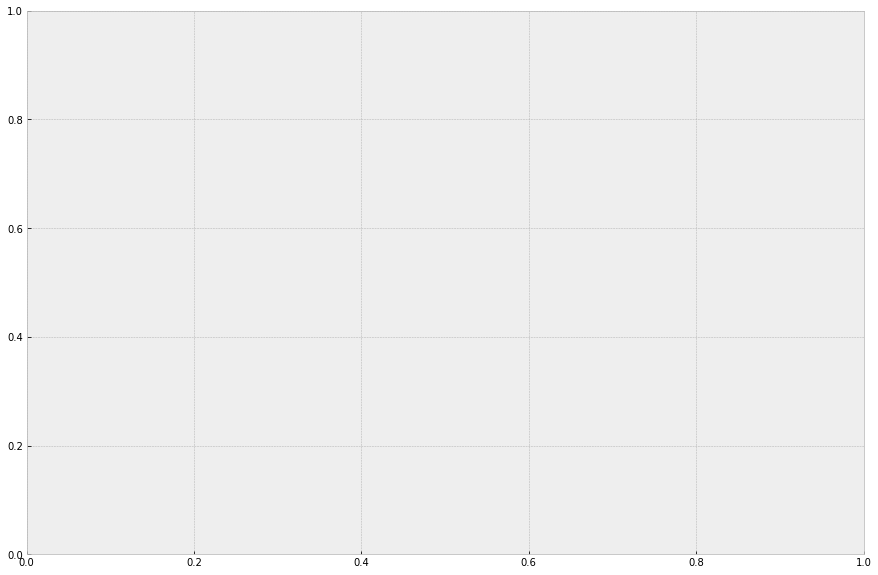

In [80]:
fig, ax = plt.subplots(figsize=(15,10))
line = np.linspace(0,100000000,endpoint=True)
diag = lambda x : x
ax.scatter(y_test,preds_gb)
ax.plot(line, diag(line))

In [ ]:
ada_model = AdaBoostRegressor(learning_rate=0.010,
                            n_estimators=250)
ada_model.fit(X_train,y_train)

In [81]:
ada_preds = ada_model.predict(X_test)
print("R2 Score: " + str(r2_score(y_test, ada_preds)))
print("MSE : " + str(mean_squared_error(y_test, ada_preds)))
print("RMSE: " + str(sqrt(mean_squared_error(y_test, ada_preds))))

NameError: name 'ada_model' is not defined

In [82]:
n_samples, n_feats = X_train.shape

tf_model = Sequential() # sequence of layers

denselayer = Dense(units=200,
                input_dim=n_feats,
                kernel_initializer='uniform',
                activation='sigmoid')

hidden_layer = Dense(units=200,
                kernel_initializer='uniform',
                activation='sigmoid')

hidden_layer1 = Dense(units=100,
                kernel_initializer='uniform',
                activation='sigmoid')

out_layer = Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid')


tf_model.add(denselayer)
tf_model.add(hidden_layer)
tf_model.add(hidden_layer1)
tf_model.add(out_layer)


tf_model.compile(loss='mse', 
              optimizer='adam', metrics=['mae','mse'] )

NameError: name 'X_train' is not defined

In [83]:
tf_model.fit(X_train, y_train, epochs=50, batch_size=5000, verbose=1, validation_split=0.1, use_multiprocessing=True)

NameError: name 'tf_model' is not defined

In [ ]:
tf_preds = tf_model.predict(X_test)
print("MSE : " + str(mean_squared_error(y_test, tf_preds)))
print("RMSE: " + str(sqrt(mean_squared_error(y_test, tf_preds))))